## Содержание

## Распределения

### Нормальное распределение

Рассмотрим саммую классическую задачу по терверу: ковбой стреляет по мишеням на протяжении года каждый день по 100 выстрелов. С вероятностью 0.5 ковбой попадет по мишени. Нас интересует вопрос: как будет выглядеть распредение количества попаданий по мишеням? Давайте попробуем визулизировать данную ситуацию 

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Какие мы выводы можем отсюда сделать? Если взять, например, наблюдения и распределение выстрелов стрелка за один год получется что-то странное,

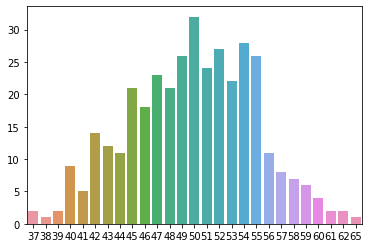

In [18]:
days = 365*1
shots = 100
info = dict()

for _ in range(days):
    hits = 0
    for _ in range(shots):
        hits += np.random.choice([0, 1])
    info.setdefault(hits, 0)
    info[hits] += 1
    
sns.barplot(x=list(info.keys()), y=list(info.values()));

Но если мы значительно увеличим количество наблюдаемых лет (в идеале при стремлении к бесконечности), то наше распрделение примет осязаемую форму

In [9]:
days = 365*100
shots = 100
info = dict()

for _ in range(days):
    hits = 0
    for _ in range(shots):
        hits += np.random.choice([0, 1])
    info.setdefault(hits, 0)
    info[hits] += 1
    

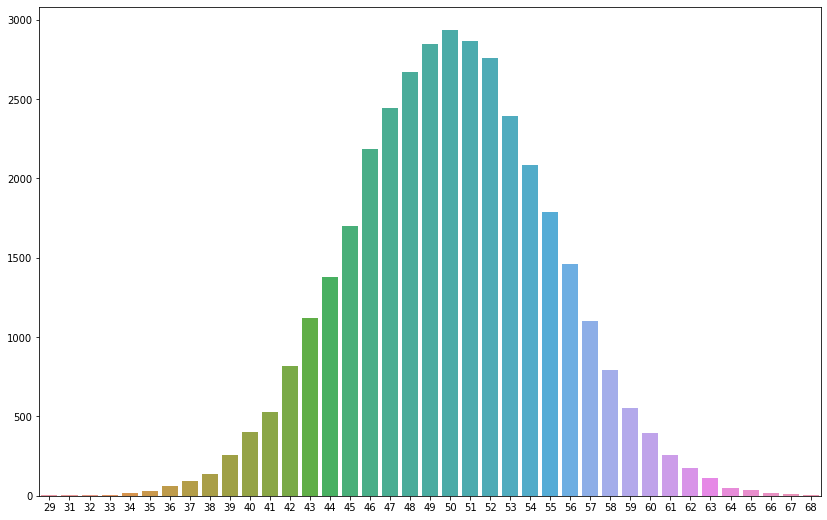

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14,9))

sns.barplot(x=list(info.keys()), y=list(info.values()), ax=ax);

Из исходных данных E(x) = 100 * 0.5 = 50, что совпадает с максимальный частотой суммы попаданий. Теперь мы получили что-то более похоже на это загадочное нормальное распределние. Теперь разберемся, что же оно из себя пресдтваляет в формальном варианте

**Обозначение** 

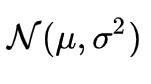

Где $\mu$ - математическое ожидание E(x), a $\sigma^2$ - дисперсия Var(x) или стаднартное отклонение в квадрате $\sigma$

**Формула**

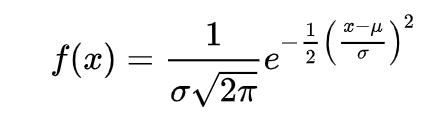

Рассмотрим пример:

In [10]:
def norm_dist (data, mean, sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((data-mean)/sd)**2)
    return prob_density

In [7]:
data = np.linspace(1,10, 100)
mean = np.mean(data)
sd = np.std(data)

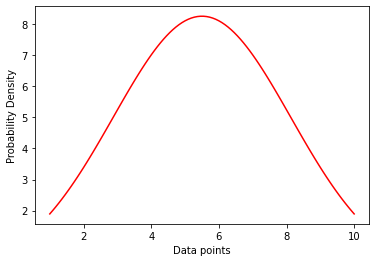

In [12]:
plt.plot(data, norm_dist(data, mean, sd) , color='red')
plt.xlabel('Data points')
plt.ylabel('Probability Density');

Теперь посмотрим, как изменение параметров распределения $\mu$ и $\sigma^2$ влияет на форму его ихображения

Так как наблюдение с наибольшей частотой лежит в центре и является матожиданием, то уменьшение или увеличение парматера $\mu$, будет сдвигать выборку влево или вправо соответственно

Теперь обратим внимание на изменение стандартного отклонения

In [13]:
import scipy.stats as sps

In [16]:
X = sps.norm(loc=0, scale=1).rvs(size=200) #мы сгенерировали выборку с мат ожиданием 0 и лисперсией 1 из 200 элементов

array([-5.38386976e-01, -3.37148953e-01,  2.85665112e-01, -1.08174673e+00,
        2.03247746e-01,  1.34934529e+00, -6.90821736e-01, -1.06251949e+00,
       -7.43050707e-01,  1.79347332e+00, -2.09582397e+00, -1.41259688e+00,
       -1.60637551e-01,  3.86020619e-01, -2.42187989e-01, -4.23034397e-01,
        9.59544887e-01,  1.53535501e-01,  1.09787734e+00,  4.95092263e-01,
       -8.50676675e-02,  1.66843553e-01,  3.90367148e-01, -3.21509371e-01,
        1.63292372e+00, -8.99390671e-01, -7.33132782e-03,  1.05023470e+00,
       -4.37800379e-01, -8.11219724e-01, -1.12386031e+00, -1.30589302e+00,
        4.46397851e-01, -1.01371639e+00, -6.82184760e-01,  8.19615184e-01,
       -7.21311521e-01, -3.65669550e-01,  9.93102662e-01, -3.62383162e-01,
        6.74479185e-02,  5.46882972e-01,  9.85009571e-01, -1.04088580e+00,
        1.08589422e+00, -3.73950425e-02, -1.52941937e-02, -8.97776667e-01,
       -7.26388129e-01,  2.02224426e-01, -7.33018745e-01,  3.15098979e-01,
        1.55533517e-01, -

In [21]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()
    
#источник: https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html
#рекомендую поизучать, чтобы углубить знания в работе с выборками и распределениями 

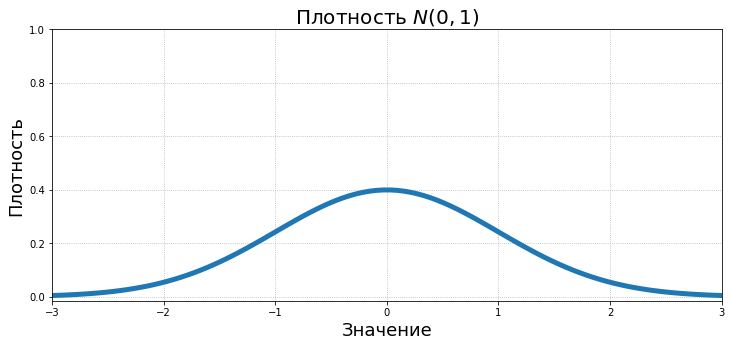

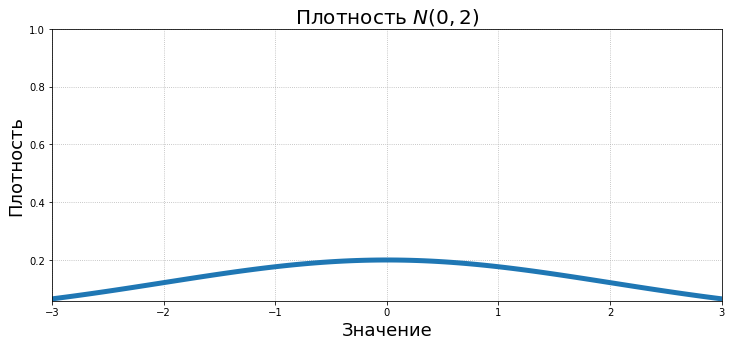

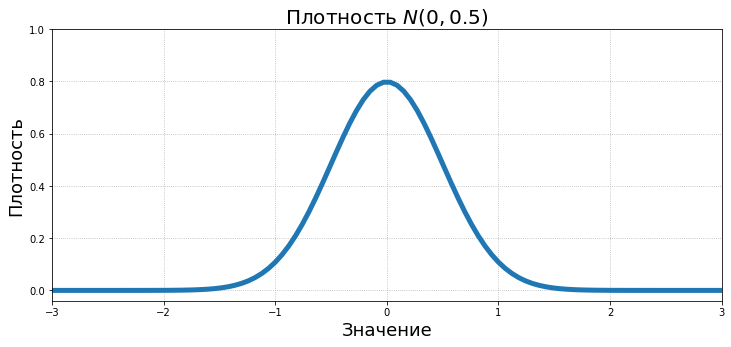

In [25]:
show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=1, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=1
)

show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=1, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=2
)

show_pdf(
    pdf=sps.norm.pdf, xmin=-3, xmax=3, ymax=1, grid_size=100, 
    distr_name=r'$N({loc}, {scale})$', loc=0, scale=0.5
)

По рисункам видно, что уменьшение диспресии, делает выборку более сконцентрированной к центру (рис 3), а ее увеличение делает ее более плоской и прижатой к оси х (рис 2)

**Практика**

Мы знаем, что рост взрослого человека - это случайная величина, которая нормально распрделена 

In [39]:
data = np.arange(150, 200, 0.1)

In [53]:
pdf = sps.norm.pdf(data, loc=173, scale=5)

In [54]:
import seaborn as sns

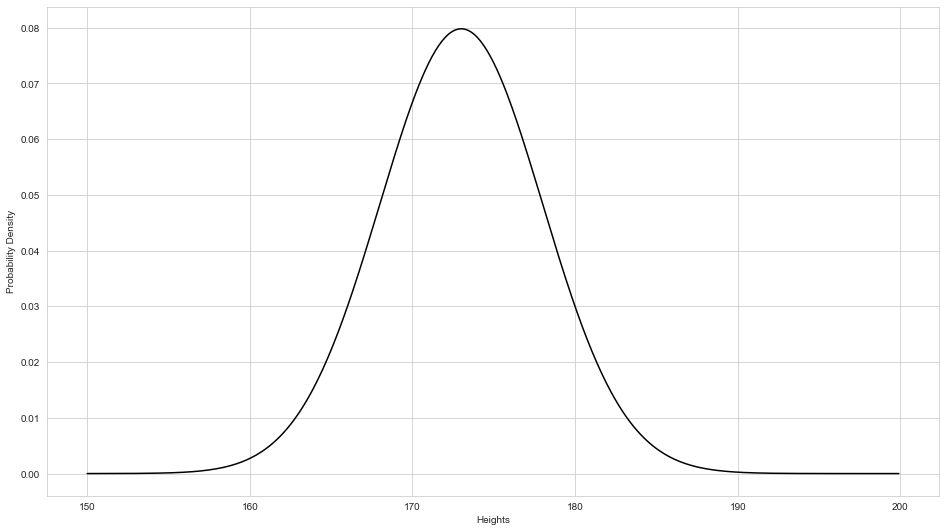

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))
sns.set_style('whitegrid')
sns.lineplot(x=data, y=pdf, color='black', ax=ax)
plt.xlabel('Heights')
plt.ylabel('Probability Density');

Найдем вероятность того, что рост человека будет меньше 160 см

In [58]:
sps.norm(loc=173, scale=5).cdf(165)

0.054799291699557974

Найдем вероятность того, что рост человека будет от 170 до 180

In [61]:
sps.norm(loc=173, scale=5).cdf(180) - sps.norm(loc=173, scale=5).cdf(170)

0.6449902230161553

Надите вероятность того, что рост человека будет больше 175

In [ ]:
#solution

Найдите такие возрастные границы, чтобы вероятность того, что рост человека будет пренадлежать этому промежутку будет равняться 0.95

In [ ]:
#solution 

**Задача 1**

Говорят IQ тоже нормально распределен
1. Сгенерируйте выборку по распределению IQ из 1000 объектов , если известно, что $\mu$ = 100, $\delta$ = 15
2. Какая вероятность, что случайно взятый человек, будет иметь IQ = 120
3. Постройте 99%-й доверительный интервал для случайно взятого IQ

In [ ]:
#solution

**Задача 2**

Для анализа возьмём данные по распределению количества мальчиков в семьях с 12-ю
детьми в Саксонии в 19-м веке
https://github.com/vincentarelbundock/Rdatasets/raw/master/csv/vcd/Saxony.csv.
   1. Визуаализируйте с помощью гистограмки полученные данные. Сколько всего семей в наборе данных?
   2. Предположим, что вероятности рождения мальчика в каждой семье имеют бета распределение с параметрами  $\alpha$ и $\beta$ и независимы. Оцените параметры $\alpha$ и $\beta$ методом максимального правдопдобия.
   3. Постройте 99%-е доверительные интервалы для оценённых параметров.
   4. Постройте 99%-й доверительный интервал для вероятности рождения ровно 6 мальчиков в семье с 12-ю детьми.
   5. Сравните табличкой фактические частоты и прогнозируемые вероятности для каждогоколичества детей

In [64]:
import pandas as pd

In [69]:
df = pd.read_csv('https://github.com/vincentarelbundock/Rdatasets/raw/master/csv/vcd/Saxony.csv')
df

,Unnamed: 0,nMales,Freq
0,1,0,3
1,2,1,24
2,3,2,104
3,4,3,286
4,5,4,670
5,6,5,1033
6,7,6,1343
7,8,7,1112
8,9,8,829
9,10,9,478


In [70]:
#solution

**Задача 3**

 Пусть $X_{i}$ — независимы и нормальны N (µ, 1). Какова вероятность того, что интервал [$X_{10}$ −1; $X_{10}$ + 1] накроет неизвестное µ? Постройте 90%-ый доверительный интервал для µ вида
[$X_{10}$ − k; $X_{10}$ + k].

In [ ]:
#solution

**Идем дальше...**

Нормальное распределение с параметрами N(0,1) называют стандартным нормальным, a.k.a *z* - распределение


Любое нормальное распределение можно привести к стандартному нормальному распределение выполнив следующую операцию:

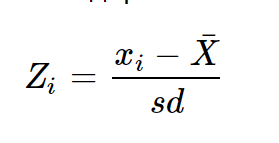

Из каждого элемента выборки вычитаем среднее и делим на стандартое отклонение, чтобы получить стандартное нормальное распределение 

**Зачем оно существует**

Z - распределение позволяет сравнивать выборки с учетом средних значений и стандартных отклонений

При работе с множеством признаков нормализация позволяет улучшить восприятие и качество интерпритируемых результатов 

*Пример*:

Студенты учатся у двух разных преподавателей, у которых немного разный подход к подаче материалов в контрольным (один из них более лояльный, другой строже). Определите кто из них двоих умнее 

In [8]:
group1_grades = np.array([57, 73, 23, 51, 43, 47, 44, 42, 42, 39, 65, 50, 54, 48, 46, 33, 37])
group2_grades = np.array([82, 76, 68, 77, 79, 69, 59, 62, 67, 72, 79, 85, 92, 100, 93, 75, 77])

In [12]:
np.std(group1_grades)

11.338454640435705

In [9]:
Petrov = group1_grades[0] #57 баллов
Sidorov = group2_grades[0] #82 балла

In [19]:
def normalize(data: np.array) -> np.array:
    return np.asarray(list(map(lambda x: (x - np.mean(data))/np.std(data), data)))

In [20]:
normalize(group1_grades)

array([ 0.90789424,  2.31902128, -2.09075073,  0.3787216 , -0.32684193,
        0.02593984, -0.23864649, -0.41503737, -0.41503737, -0.67962369,
        1.61345776,  0.29052616,  0.64330792,  0.11413528, -0.0622556 ,
       -1.20879633, -0.85601457])

In [21]:
normalize(group2_grades)

array([ 0.45264507, -0.11040124, -0.86112965, -0.01656019,  0.17112192,
       -0.7672886 , -1.70569911, -1.42417596, -0.9549707 , -0.48576544,
        0.17112192,  0.73416823,  1.39105559,  2.141784  ,  1.48489664,
       -0.20424229, -0.01656019])

Мораль: несмотря на то, что у Петрова балл меньше, чем у Сидорова, мы не можем с уверенностью утверждать что Сидоров умнее

**Немного о проверке гипотез и Z-тесте**

Предположим, у нас есть 2 сайта с разным дизайном, и нам нужно проверить эффетивность этих двух сайт. Выяснить какой дизайн наиболеепривлекательный для клиента

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('new-site.tsv', sep='\t')
df

,site,dwell-time
0,0,2
1,0,48
2,0,15
3,0,16
4,0,38
...,...,...
295,0,22
296,0,7
297,1,144
298,0,89


*Задачи:*

1. Напишите функцию, считающую совместную стандартную ошибку
2. Посчитаюйте z-статистику и уровень доверия
3. Сделайте вывод исходя из условия

In [ ]:
#solution

**Нормальное распределение обсудили, поговорим про ненормальное T-распределение**

Проработав с прошлым примером, мы можем заметить, что на обновленном сайте выборка состоит всего лишь из 16 человек, что очень мало, чтобы сравнивать данные. Что мы можем сделать, чтобы их сравнить?

Есть распределение, которое позволить экстраполирует увеличинную неопределенность стандартной ошибки маленькой выборки на более большую

1. Выполните t-тест для этих выборок на уровне доверия 1% и 5%
2. Сравните полученные резульаты

In [1]:
#solution